## Build type sections

In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.collections import LineCollection, PatchCollection
from matplotlib.colors import ListedColormap, BoundaryNorm

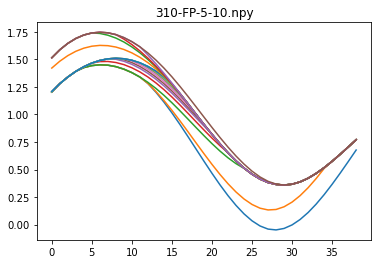

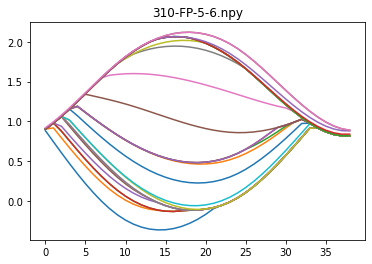

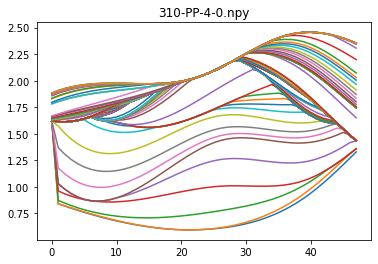

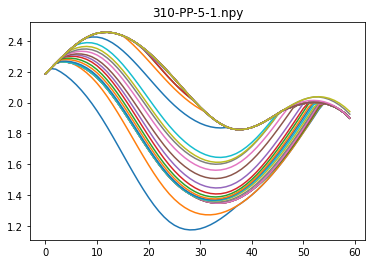

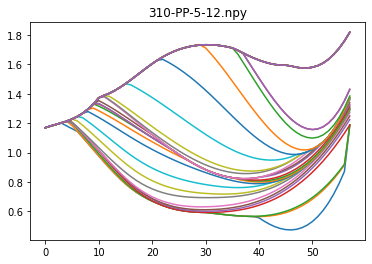

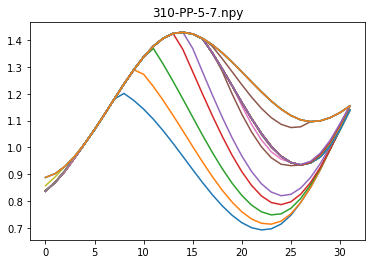

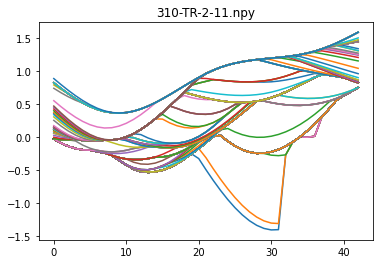

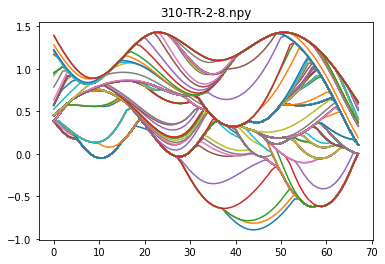

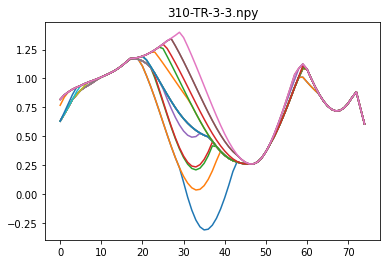

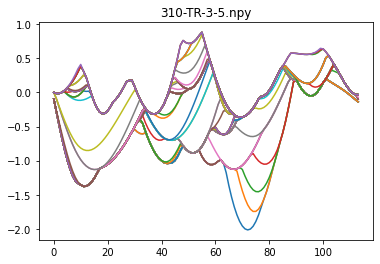

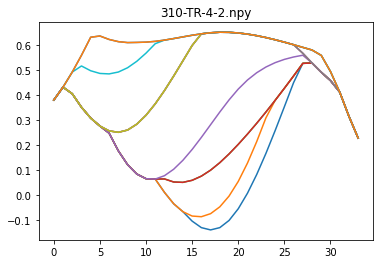

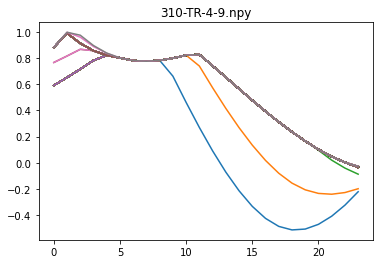

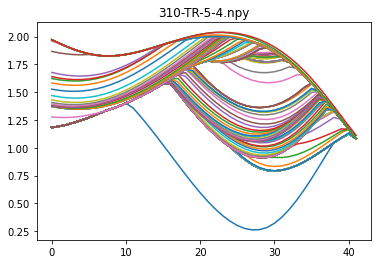

In [21]:
### go into bar library and import + process each bar in a loop
## plot only the fully preserved bars
init = '/Volumes/SAF_Data/NAYS2DH_files/Data/nparrays/barpkg-arrays/agubh2-100m-mmp'
for root, dirs, files in os.walk(init):
    for file in files:
        if '310-' in file:
            arr = np.load(os.path.join(root, file), allow_pickle = True)
            plt.figure()
            for i in range (0, len(arr)):
                plt.plot(arr[i, :, 0])
                plt.title(file)
        # arr = arr[:, :, 3] ##extract flow depth array
        # cv_flowdepth = stats.variation(arr, axis = 1)
        # np.save(f'/Volumes/SAF_Data/NAYS2DH_files/Data/nparrays/flowdepth-cvs/{file}-cvdep.npy', cv_flowdepth, allow_pickle=True)

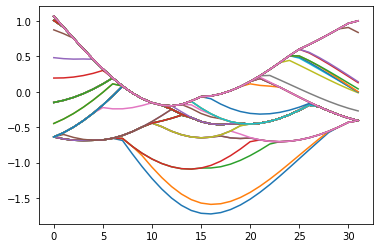

In [17]:
init = '/Volumes/SAF_Data/NAYS2DH_files/Data/nparrays/barpkg-arrays/agubh2-100m/740/'
arr = np.load(f'{init}/740-TR-3-7.npy')
for i in range (0, len(arr)):
     plt.plot(arr[i, :, 0])

In [18]:
arr.shape

(117, 32, 5)

In [12]:
## IMPORT MASTER ARRAY
xlsxname = 'june13_master.xlsx'
savefilesto = '/Volumes/SAF_Data/bar-manuscript_sum22/data-interp/'
mypath = f'/Volumes/SAF_Data/NAYS2DH_files/Data/BarCSVs/concat-files/{xlsxname}'
allbars = pd.read_excel(mypath, header=0, usecols = 'A:BF') ## change if you add more columns to the raw dataset

## Plot all bars

fig, ax = plt.subplots(12, 14, sharey = False, sharex = False, tight_layout = False, figsize = (30, 22), dpi = 100)
ax = ax.ravel()
process_flags = np.unique(allbars['process interp'])

counter = 0
for i in process_flags:
    croppy = allbars['array name'][allbars['process interp']==i] ##get the name of the array to import
    for j in croppy:
        folnam = j[:3]
        ## load, and overwrite each array in the process flag
        arr = np.load(f'/Volumes/SAF_Data/NAYS2DH_files/Data/nparrays/barpkg-arrays/Summer-bpkg-redo/JUNE132022/{folnam}/{j}.npy', allow_pickle = True)
        for a in range (0, len(arr)):
            ax[counter].plot(arr[a, :, 0])
        ax[counter].set_title(f'{j} \n{i}')
        ax[counter].set_aspect(10)
        if counter <= 167:
            counter = counter+1

In [93]:
posnew

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78])

In [38]:
latacc_types = '340-FP-5-0', '250-FP-4-6'
epilatacc_types = '710-FP-5-1', '430-PP-4-2'
# latinf_types = '550-FP-4-18'
agginf_types = '310-FP-5-6'
diffthr_types = '310-TR-2-8'
# thrinf_types = '150-TR-2-0'
typelist_names = '340-FP-5-0', '250-FP-4-6', '710-FP-5-1', '430-PP-4-2', '310-FP-5-6', '310-TR-2-8'
# typelist = ['850-FP-5-2', '800-FP-4-4', '800-FP-5-3','550-PP-3-0', '150-TR-3-6', '300-TR-2-4']

In [39]:
typelist_names

('340-FP-5-0',
 '250-FP-4-6',
 '710-FP-5-1',
 '430-PP-4-2',
 '310-FP-5-6',
 '310-TR-2-8')

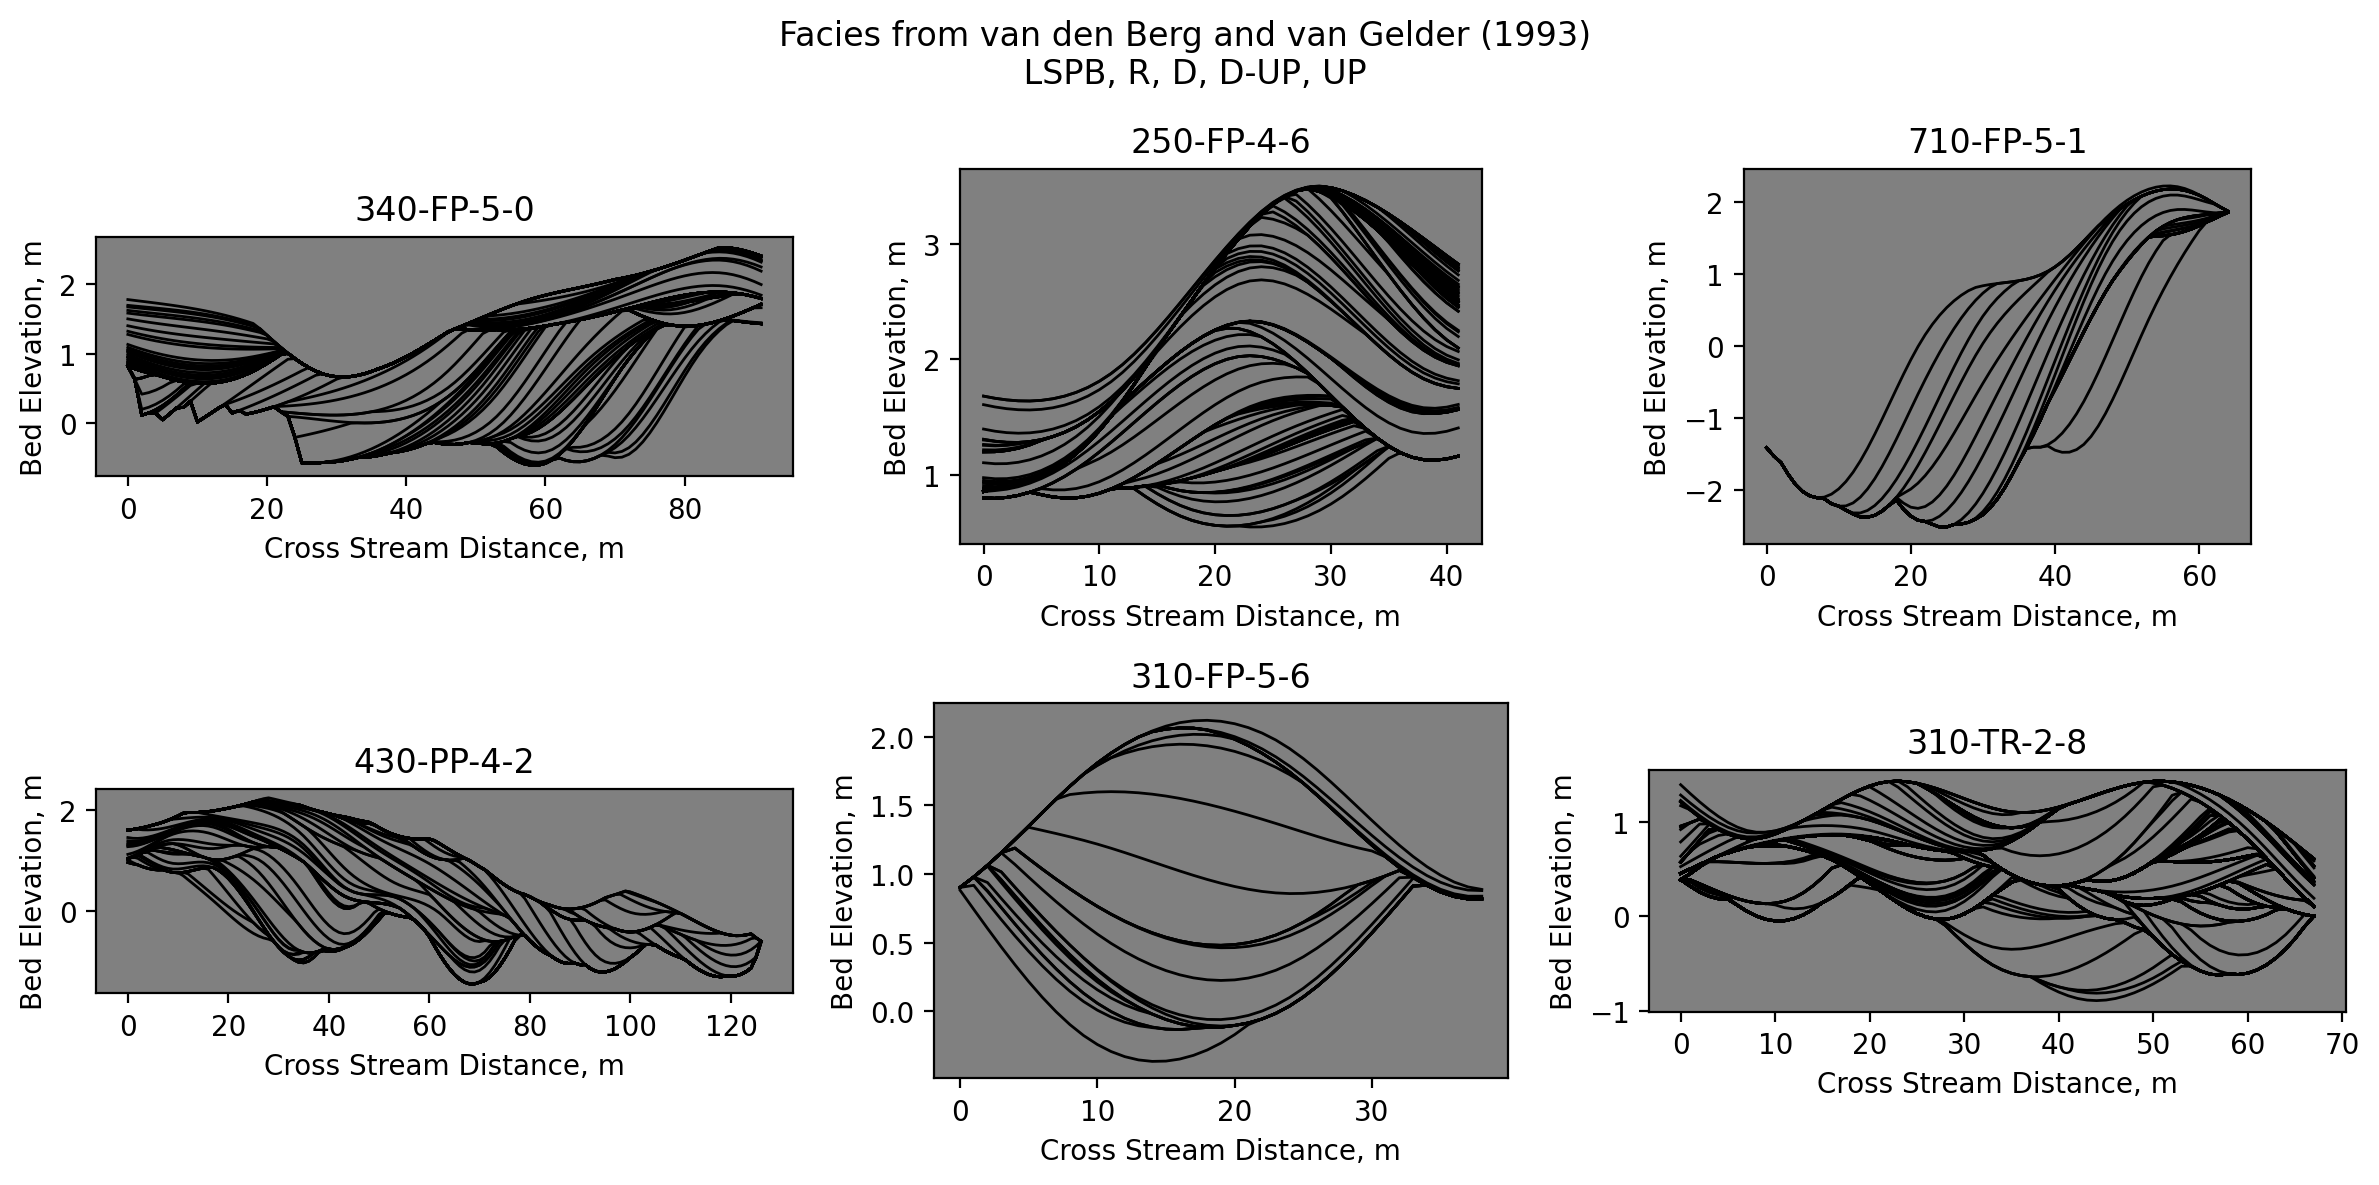

In [41]:
mmprange = [0.01, 0.025, 0.15, 0.35, 1.5, 10] ##### LP, R, D, D-UP, UP
cmap_vvfac = ListedColormap(['xkcd:dark brown', 'xkcd:shit', 'xkcd:dark tan', 'xkcd:sand', 'xkcd:stone'])
norm_vvfac = BoundaryNorm(mmprange, cmap_vvfac.N)
d50 = 0.31e-3 ## grain size in m 

fig, ax = plt.subplots(2, 3, figsize = (12, 6), tight_layout = True, sharex = False, sharey = False, dpi = 200)
ax = ax.ravel()
for idx, typ in enumerate(typelist_names):
    folnam = typ[:3]
    arr = np.load(f'/Volumes/SAF_Data/NAYS2DH_files/Data/nparrays/barpkg-arrays/agubh2-100m-mmp/{folnam}/{typ}.npy')
    # vel = arr[:, :, 4] ##extract flow depth array
    # dep = arr[:, :, 3] ##extract flow depth array
    # mmp =(1000*(vel**2))/(1650*((18*(np.log10(4*dep/d50)))**2)*d50)##### modified mobility parameter
    posnew = np.arange(0, arr.shape[1])
    
    for t in range (0, len(arr)-1):
        # for xpos in posnew[:-1]:
        #     fills = ax[idx].fill_between([xpos, xpos+1], arr[t, xpos, 0], arr[t+1, xpos+1, 0], color = cmap_vvfac(mmp[t, xpos+1]))#
        elevint = arr[t, :, 0] 
        vvfacies = arr[t, :, -1]
        ax[idx].plot(elevint, c = 'k', lw = 1)
        pointsint = np.array([posnew, elevint]).T.reshape(-1, 1, 2)
        segmentsint = np.concatenate([pointsint[:-1], pointsint[1:]], axis=1)
        
        # vvfac = LineCollection(segmentsint, cmap = cmap_vvfac, norm = norm_vvfac)
        # vvfac.set_array(vvfacies)
        # vvfac.set_linewidth(2)
        # vvfac_line = ax[idx].add_collection(vvfac)


        # ax[idx].plot(arr[t, :, 0], 'k', lw = 1, alpha = 0.3)
    ax[idx].set_aspect(10)
    ax[idx].set_ylabel('Bed Elevation, m')
    ax[idx].set_xlabel('Cross Stream Distance, m')
    ax[idx].set_title(typ)
    ax[idx].set_facecolor('grey')
    
fig.suptitle('Facies from van den Berg and van Gelder (1993) \n LSPB, R, D, D-UP, UP')
plt.savefig('/Volumes/SAF_Data/bar-manuscript_sum22/figures/type-bars-k.png', transparent = True)

### Get distributions of facies in sections

In [25]:
init = '/Volumes/SAF_Data/NAYS2DH_files/Data/nparrays/barpkg-arrays/agubh2-100m-mmp'
preservation = pd.DataFrame(columns = ['FP', 'PP', 'TR'])
section = pd.DataFrame(columns = ['340', '430', '370', '670'])
for root, dirs, files in os.walk(init):
    for file in files:
        arr = np.load(os.path.join(root, file), allow_pickle = True)[:, :, -1]
        arr = arr[~np.isnan(arr)]
        dimx = arr.shape[0]
        if 'FP-' in file:
            facies = pd.DataFrame(np.reshape(arr, (dimx, 1)), columns = ['FP'])
        elif 'PP' in file:
            facies = pd.DataFrame(np.reshape(arr, (dimx, 1)), columns = ['PP'])
        else:
            facies = pd.DataFrame(np.reshape(arr, (dimx, 1)), columns = ['TR'])
        # print(facies)
        # print(preservation)
        preservation = pd.concat([preservation, facies])

            PP
0     0.075695
1     0.072420
2     0.069061
3     0.065683
4     0.062345
...        ...
2944  0.021066
2945  0.017348
2946  0.014066
2947  0.011204
2948  0.008741

[2949 rows x 1 columns]
Empty DataFrame
Columns: [FP, PP, TR]
Index: []
            PP
0     0.070132
1     0.073932
2     0.077505
3     0.080710
4     0.083408
...        ...
2403  0.100958
2404  0.109530
2405  0.118491
2406  0.127779
2407  0.137325

[2408 rows x 1 columns]
       FP        PP   TR
0     NaN  0.075695  NaN
1     NaN   0.07242  NaN
2     NaN  0.069061  NaN
3     NaN  0.065683  NaN
4     NaN  0.062345  NaN
...   ...       ...  ...
2944  NaN  0.021066  NaN
2945  NaN  0.017348  NaN
2946  NaN  0.014066  NaN
2947  NaN  0.011204  NaN
2948  NaN  0.008741  NaN

[2949 rows x 3 columns]
            PP
0     0.079704
1     0.084688
2     0.090024
3     0.095680
4     0.101620
...        ...
3224  0.121823
3225  0.116234
3226  0.110693
3227  0.105253
3228  0.099967

[3229 rows x 1 columns]
       FP   

In [125]:
for root, dirs, files in os.walk(init):
    for file in files:
        arr = np.load(os.path.join(root, file), allow_pickle = True)[:, :, -1]
        arr = arr[~np.isnan(arr)]
        dimx = arr.shape[0]
        if '340-' in file:
            facies = pd.DataFrame(np.reshape(arr, (dimx, 1)), columns = ['340'])
        elif '430' in file:
            facies = pd.DataFrame(np.reshape(arr, (dimx, 1)), columns = ['430'])
        elif '370' in file:
            facies = pd.DataFrame(np.reshape(arr, (dimx, 1)), columns = ['370'])
        elif '680' in file:
            facies = pd.DataFrame(np.reshape(arr, (dimx, 1)), columns = ['670'])
        section = pd.concat([section, facies])

In [30]:
section['340'][pd.isnull(section['340'])]

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
11923    NaN
11924    NaN
11925    NaN
11926    NaN
11927    NaN
Name: 340, Length: 5600950, dtype: object

In [111]:
fpcrop = preservation['FP'][~pd.isnull(preservation['FP'])]
fpcrop = fpcrop[fpcrop<1]
fpcrop = fpcrop[fpcrop>0.01]

ppcrop = preservation['PP'][~pd.isnull(preservation['PP'])]
ppcrop = ppcrop[ppcrop<1]
ppcrop = ppcrop[ppcrop>0.01]

trcrop = preservation['TR'][~pd.isnull(preservation['TR'])]
trcrop = trcrop[trcrop<1]
trcrop = trcrop[trcrop>0.01]

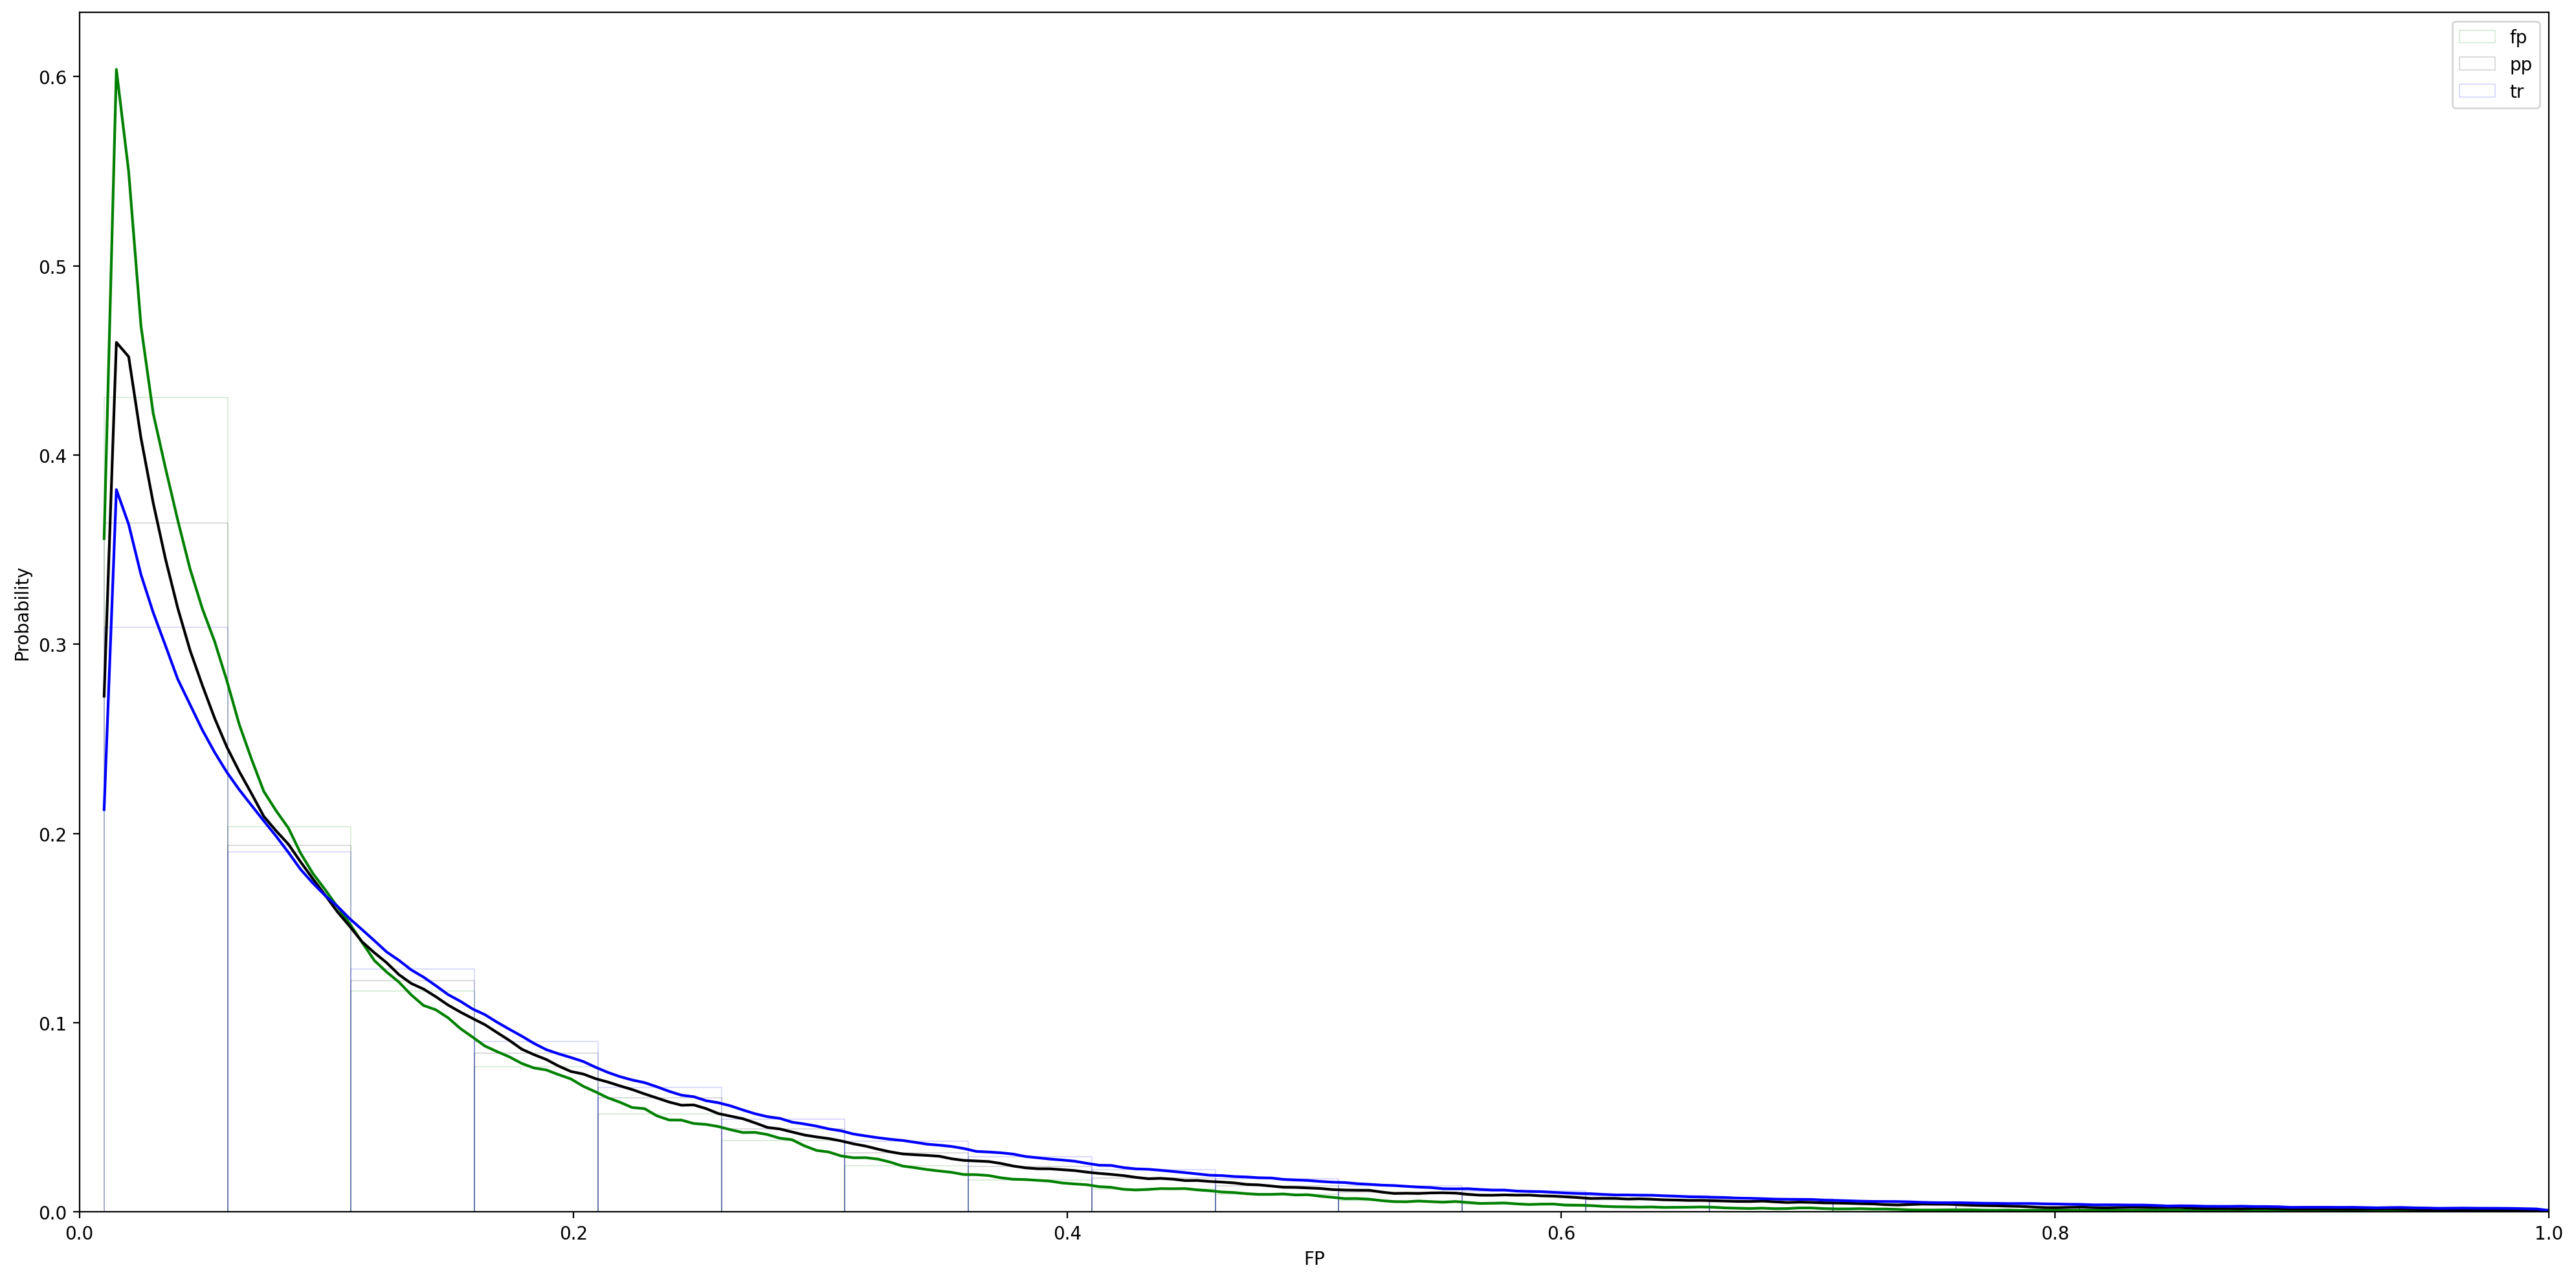

In [116]:
plt.figure(figsize = (20, 10), tight_layout = True, dpi = 200)
sns.histplot(fpcrop, binwidth = 0.05, stat = 'probability', kde = True, fill=False, linewidth=0.1, color = 'g', kde_kws = {'bw_adjust': .3}, line_kws={'color': 'green'}, label = 'fp', common_norm=True)
sns.histplot(ppcrop, binwidth = 0.05, stat = 'probability', kde = True, fill=False,linewidth=0.1,color = 'k', kde_kws = {'bw_adjust': .3},  line_kws={'color': 'black'}, label = 'pp', common_norm=True)
sns.histplot(trcrop, binwidth = 0.05, stat = 'probability', kde = True, fill = False, linewidth=0.1,  color = 'b', kde_kws = {'bw_adjust': .3}, line_kws={'color': 'blue'}, label = 'tr', common_norm=True)
plt.xlim(0, 1)
plt.legend()

(0.0, 1.5)

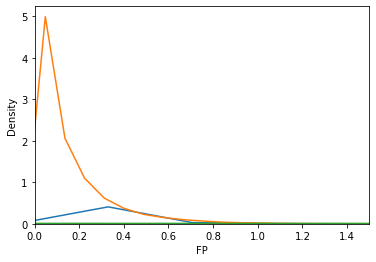

In [33]:
sns.kdeplot(data = preservation['FP'][~pd.isnull(preservation['FP'])])
sns.kdeplot(data = preservation['PP'][~pd.isnull(preservation['PP'])])
sns.kdeplot(data = preservation['TR'][~pd.isnull(preservation['TR'])])
plt.xlim(0, 1.5)

In [78]:
sec430.min()

1.9277403138777258e-10

In [100]:
sec340 = section['340'][~pd.isnull(section['340'])]
sec430 = section['430'][~pd.isnull(section['430'])]
sec370 = section['370'][~pd.isnull(section['370'])]
sec670 = section['670'][~pd.isnull(section['670'])]

sec340 = sec340[sec340<1]
sec430 = sec430[sec430<1]
sec370 = sec370[sec370<1]
sec670 = sec670[sec670<1]

sec340 = sec340[sec340>0.01]
sec430 = sec430[sec430>0.01]
sec370 = sec370[sec370>0.01]
sec670 = sec670[sec670>0.01]

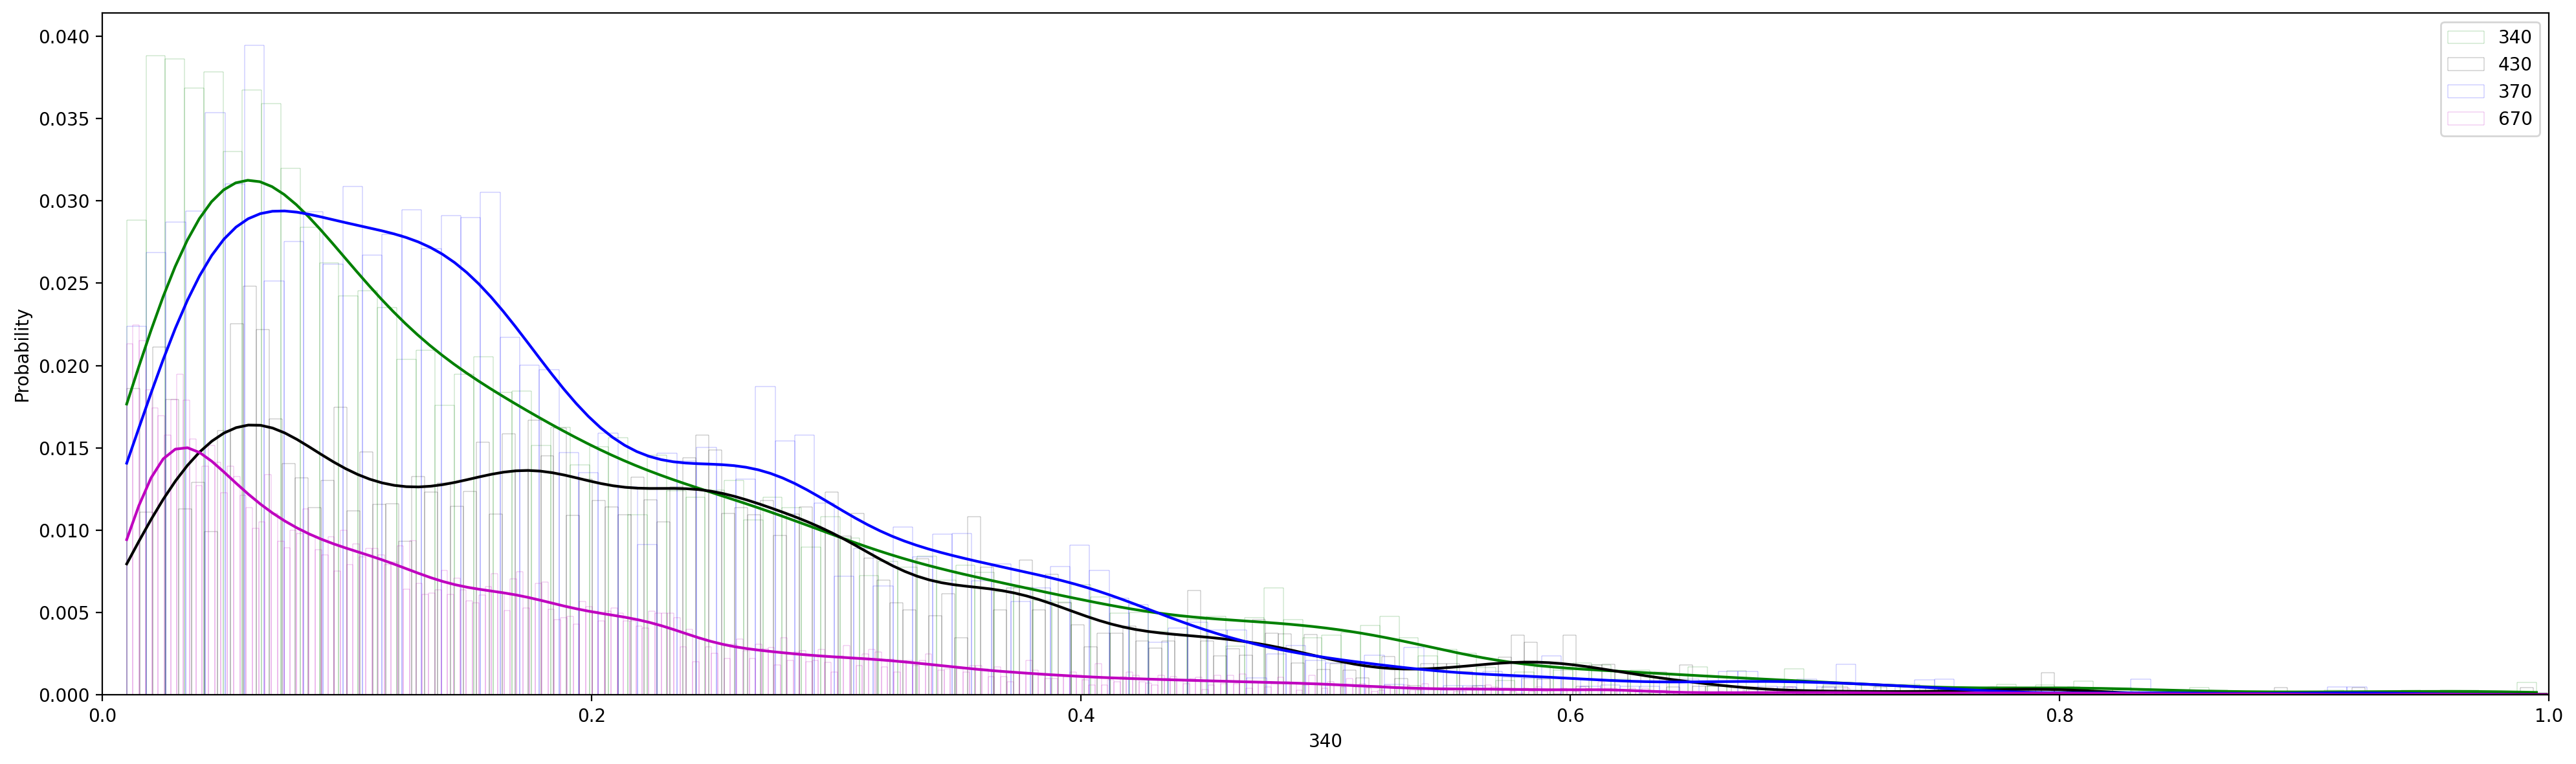

In [132]:
plt.figure(figsize = (20, 6), tight_layout = True, dpi = 200)
sns.histplot(sec340, stat = 'probability', kde = True, fill=False, linewidth=0.1, color = 'g', kde_kws = {'bw_adjust': 2}, line_kws={'color': 'green'}, label = '340')
sns.histplot(sec430, stat = 'probability', kde = True, fill=False,linewidth=0.1,color = 'k', kde_kws = {'bw_adjust': 2},  line_kws={'color': 'black'}, label = '430')
sns.histplot(sec370, stat = 'probability', kde = True, fill = False, linewidth=0.1,  color = 'b', kde_kws = {'bw_adjust': 2}, line_kws={'color': 'blue'}, label = '370')
sns.histplot(sec670, stat = 'probability', kde = True, fill=False,linewidth=0.1,  color = 'm', kde_kws = {'bw_adjust': 2}, line_kws={'color': 'magenta'}, label = '670')
plt.xlim(0, 1)
plt.legend()

In [130]:
len(sec340[sec340>=0.15])

71468

In [120]:
71468/148626

0.48085799254504596

In [128]:
len(sec370[sec370<=0.15])

52654

In [124]:
51571/104225

0.4948045094746942

In [129]:
len(sec670[sec670<=0.15])/len(sec670)

0.6201033606464317